## Advanced Example: Image De-Noising
Image denoising
is the process of removing image noise while at the same time trying to preserve
details and structures. We will use the Rudin-Osher-Fatemi de-noising model (ROF). Removing noise from images is important for many applications, from making your holiday photos look better to improving the quality
of satellite images. The ROF model has the interesting property that it finds a smoother
version of the image while preserving edges and structures

In [4]:
from numpy import *
def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """ An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
           using the numerical procedure presented in eq (11) A. Chambolle (2005).
           Input: noisy input image (grayscale), initial guess for U, weight of
           the TV-regularizing term, steplength, tolerance for stop criterion.
           Output: denoised and detextured image, texture residual. """
    m,n = im.shape # size of noisy image
    
    # initialize
    U = U_init
    Px = im # x-component to the dual field
    Py = im # y-component of the dual field
    error = 1
    while (error > tolerance):
        Uold = U
        # gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U's gradient
        GradUy = roll(U,-1,axis=0)-U # y-component of U's gradient
        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)
        # update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        
        U = im + tv_weight*DivP # update of the primal variable
        # update of error
        error = linalg.norm(U-Uold)/sqrt(n*m);
        
    return U,im-U # denoised image and texture residual

which, as the name suggests, “rolls” the
values of an array cyclically around an axis. This is very convenient for computing
neighbor differences, in this case for derivatives. We also used linalg.norm(), which
measures the difference between two arrays (in this case, the image matrices U and
Uold)

In [8]:
# Let’s start with a synthetic example of a noisy image:
from numpy import *
from numpy import random
from scipy.ndimage import filters
#import rof
# create synthetic image with noise
im = zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255
im = im + 30*random.standard_normal((500,500))
U,T = denoise(im,im)
G = filters.gaussian_filter(im,10)
# save the result
from scipy.misc import imsave
imsave('synth_rof.pdf',U)
imsave('synth_gaussian.pdf',G)

C:\Users\YOGENDER\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app
C:\Users\YOGENDER\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


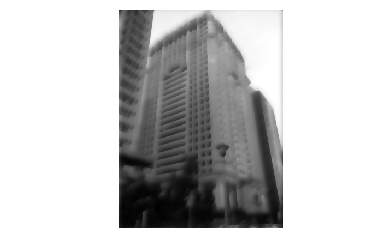

In [12]:
#Now, let’s see what happens with a real image:
from PIL import Image
from pylab import *

im = array(Image.open('image.jpg').convert('L'))
U,T = denoise(im,im)
figure()
gray()
imshow(U)
axis('equal')
axis('off')
show()